# INTRODUCTION

### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl 
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

In [68]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Read data

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

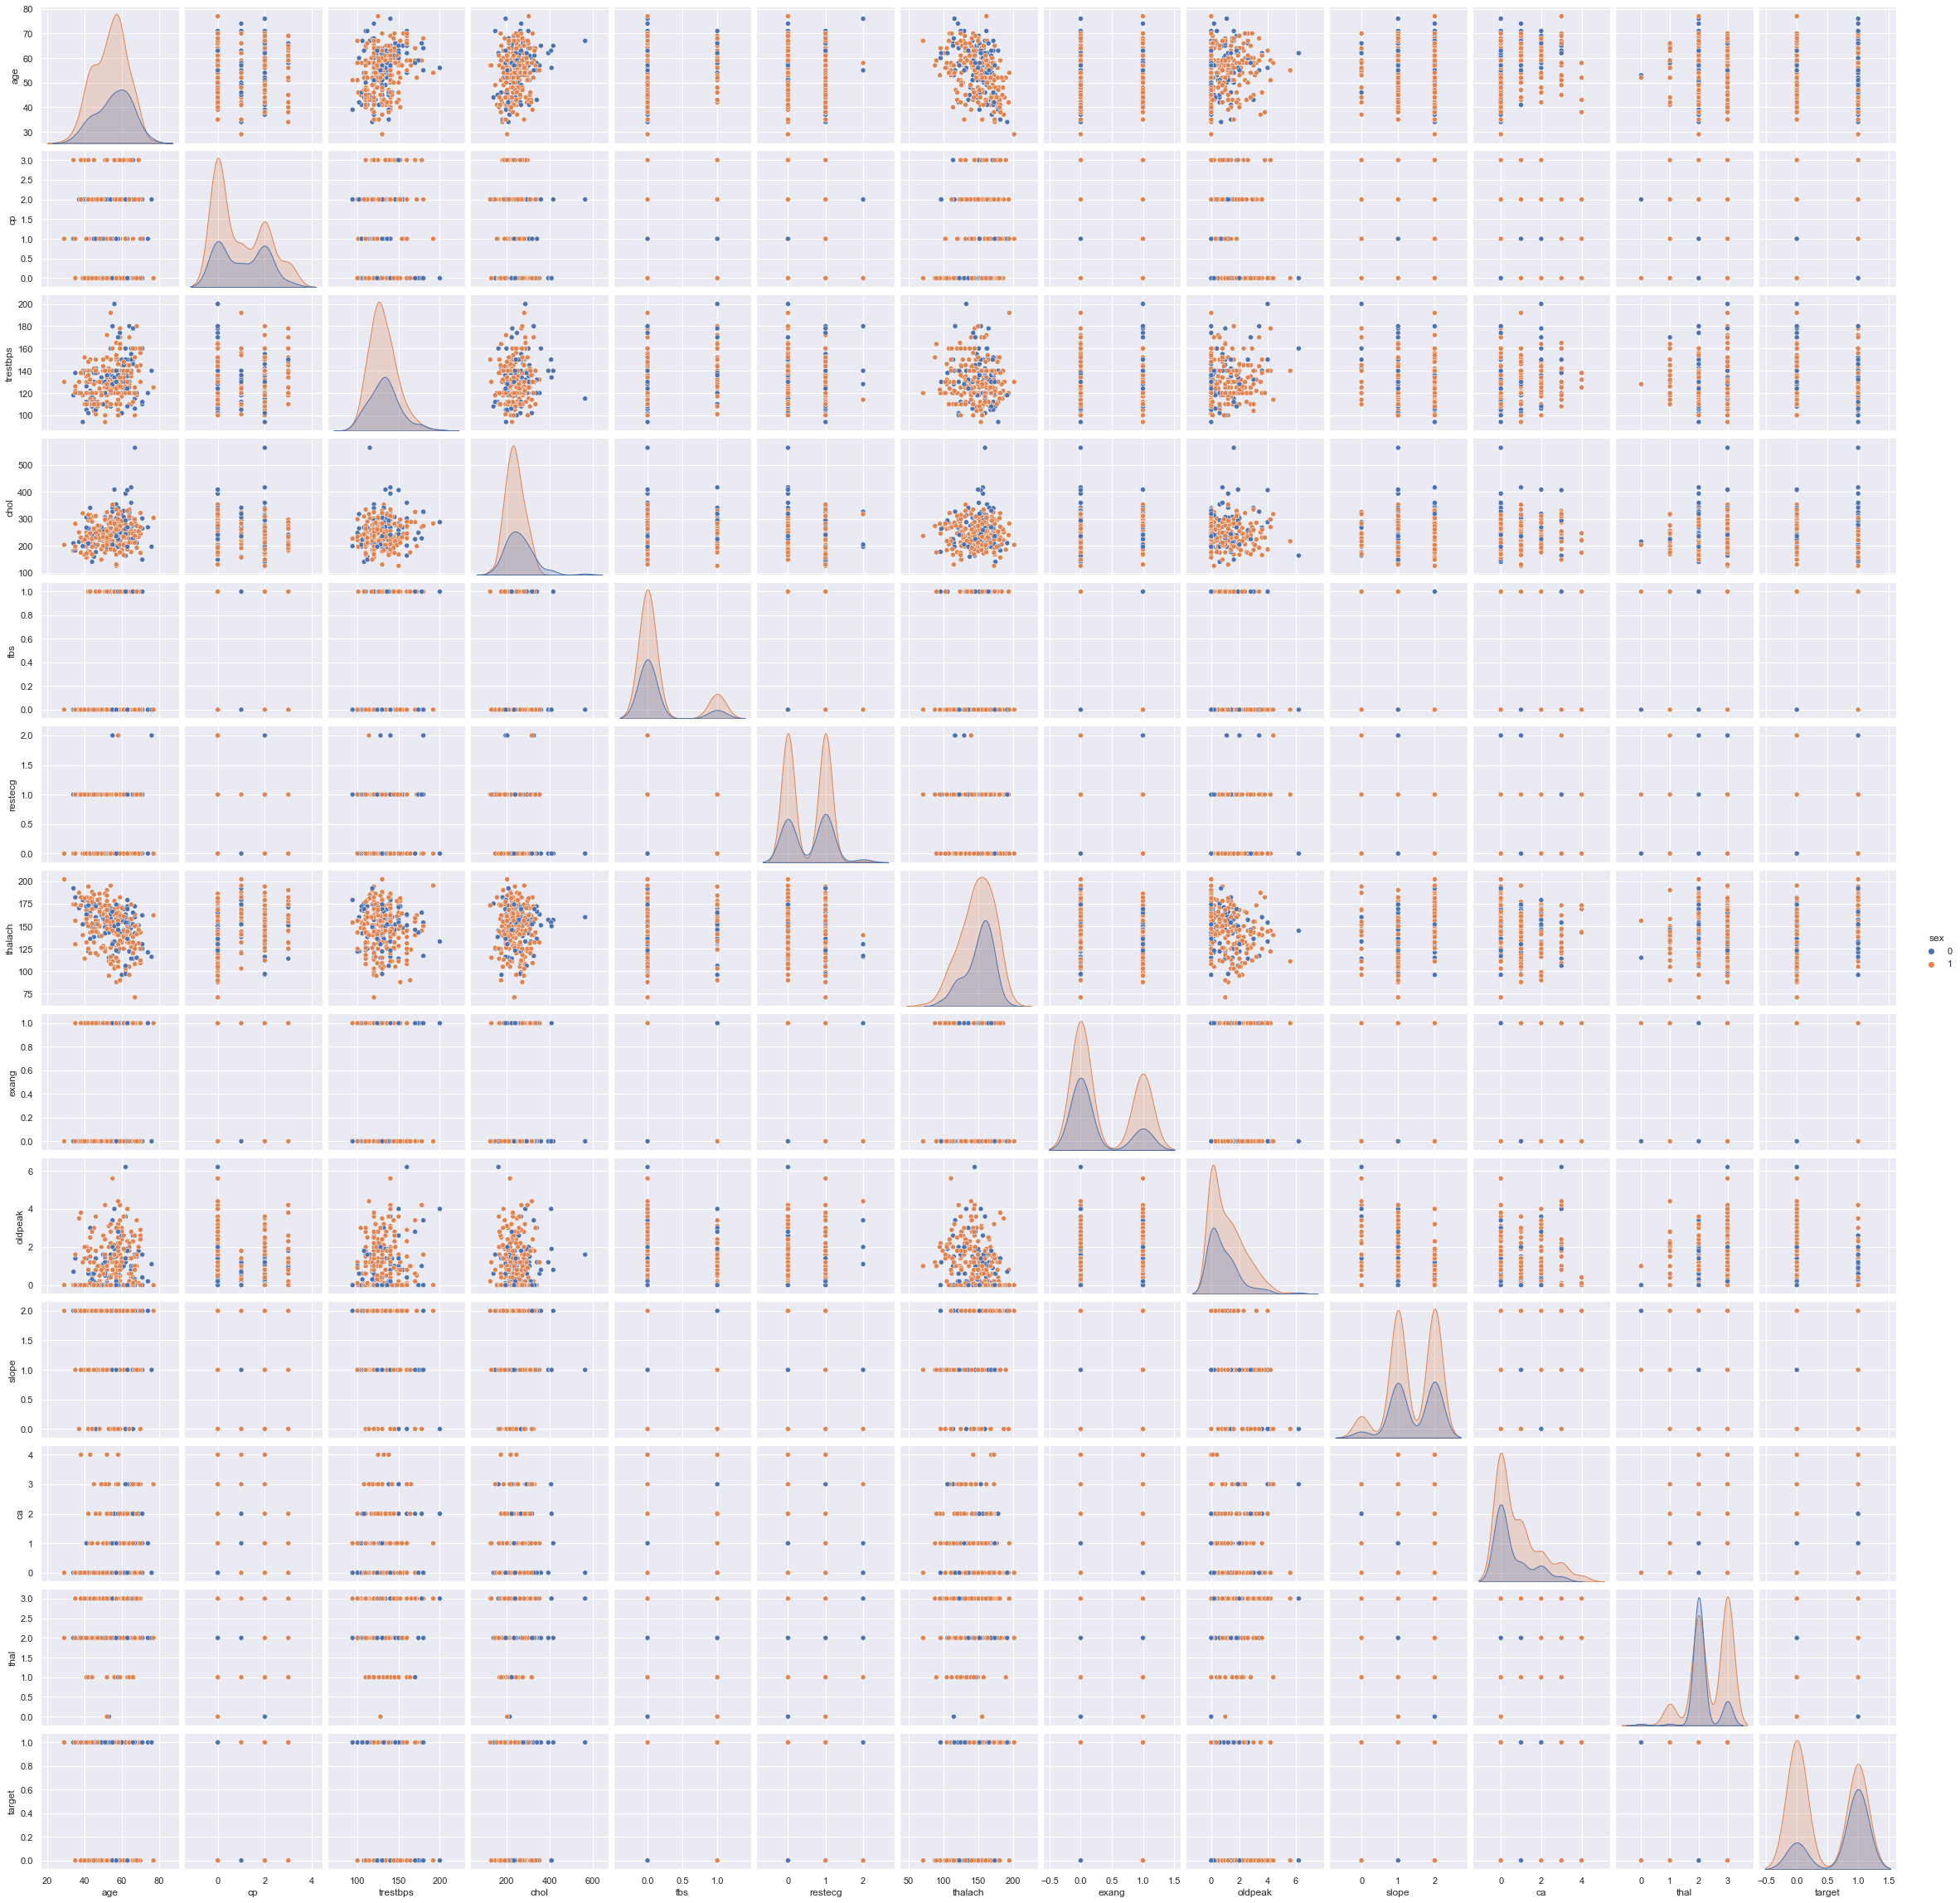

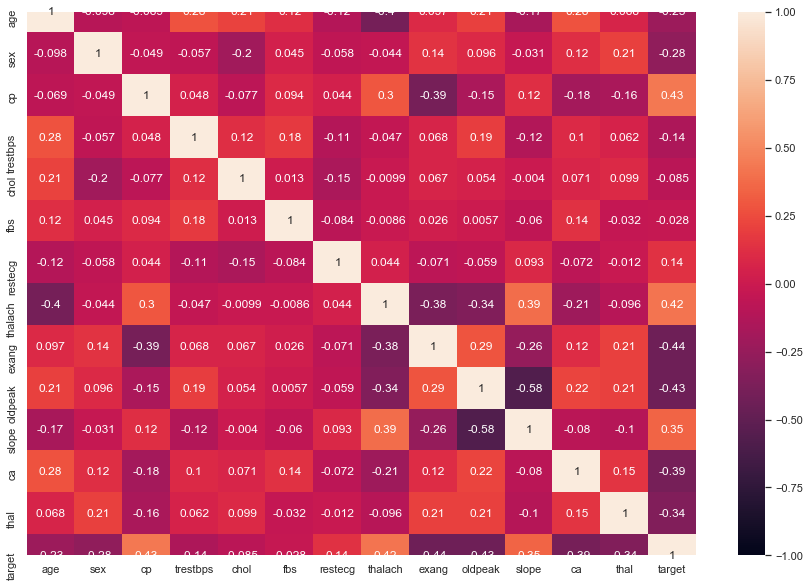

In [7]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.pairplot(data, hue='sex')
plt.show()
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

### find categorial features

In [8]:
for col in range(data.shape[1]):
    print(data.iloc[:, col].name,
          data.iloc[:, col].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

### make dummy features

In [9]:
data = pd.concat([data,
                  pd.get_dummies(data['cp'], prefix = "cp"),
                  pd.get_dummies(data['slope'], prefix = "slope"),
                  pd.get_dummies(data['ca'], prefix = "ca"),
                  pd.get_dummies(data['thal'], prefix = "thal")],
                 axis=1)
target = data["target"]
data.drop(columns = ["cp", "slope", "ca", "thal", "target"], inplace=True)

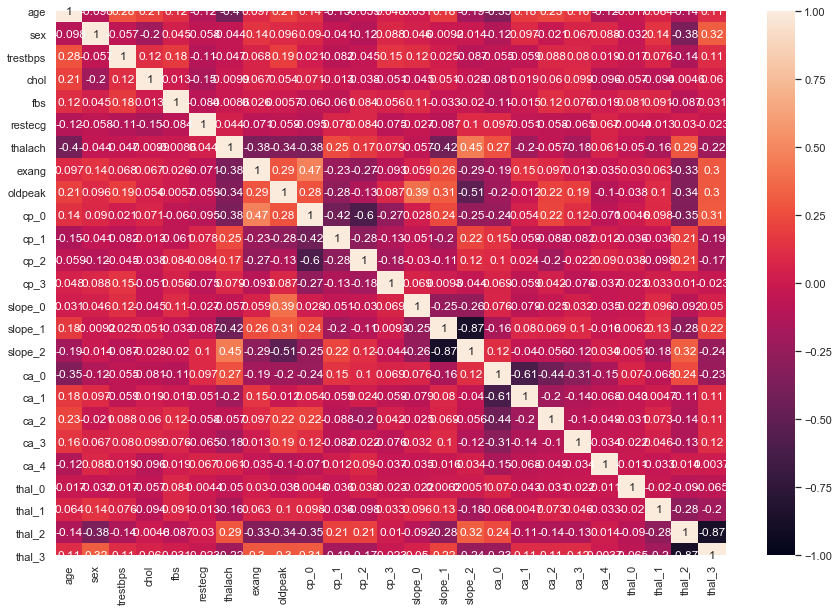

In [10]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

# Creating model

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data , target, test_size=0.2, random_state=0)

In [25]:
x_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
74,43,0,122,213,0,1,165,0,0.2,0,...,0,1,0,0,0,0,0,0,1,0
153,66,0,146,278,0,0,152,0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
64,58,1,140,211,1,0,165,0,0.0,0,...,1,1,0,0,0,0,0,0,1,0
296,63,0,124,197,0,1,136,1,0.0,1,...,0,1,0,0,0,0,0,0,1,0
287,57,1,154,232,0,0,164,0,0.0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,132,247,1,0,143,1,0.1,1,...,0,0,0,0,0,1,0,0,0,1
192,54,1,120,188,0,1,113,0,1.4,1,...,0,0,1,0,0,0,0,0,0,1
117,56,1,120,193,0,0,162,0,1.9,0,...,0,1,0,0,0,0,0,0,0,1
47,47,1,138,257,0,0,156,0,0.0,0,...,1,1,0,0,0,0,0,0,1,0


In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### LogisticRegression

In [110]:
clf_log_reg = LogisticRegression()
clf_log_reg.fit(x_train, y_train)
clf_log_reg.score(x_test, y_test)

0.9016393442622951

In [111]:
confusion_matrix(y_test, clf_log_reg.predict(x_test))

array([[23,  4],
       [ 2, 32]], dtype=int64)

### KNN

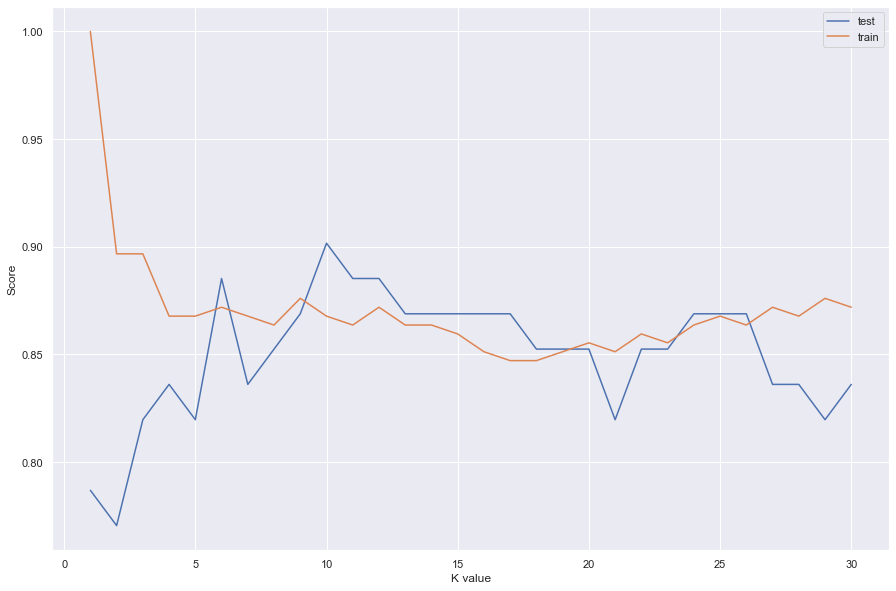

In [39]:
score_list_test = []
score_list_train = []
for i in range(1, 31):
    clf_knn = KNeighborsClassifier(n_neighbors = i, p=1)
    clf_knn.fit(x_train, y_train)
    score_list_train.append(clf_knn.score(x_train, y_train))
    score_list_test.append(clf_knn.score(x_test, y_test))
    
plt.plot(range(1,31), score_list_test, label='test')
plt.plot(range(1,31), score_list_train, label='train')
plt.xlabel("K value")
plt.ylabel("Score")
plt.legend()

In [76]:
clf_knn = KNeighborsClassifier(n_neighbors = 10, p=1)
clf_knn.fit(x_train, y_train)
clf_knn.score(x_test, y_test)

0.9016393442622951

In [77]:
confusion_matrix(y_test, clf_knn.predict(x_test))

array([[24,  3],
       [ 3, 31]], dtype=int64)

### RandomForest

In [50]:
def my_gen():
    for i in range(80, 201, 10):
        yield i
    for i in range(250, 501, 50):
        yield i
    for i in range(600, 1001, 100):
        yield i

In [44]:
clf_rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
clf_rf.fit(x_train, y_train)
clf_rf.score(x_test, y_test)

0.8524590163934426

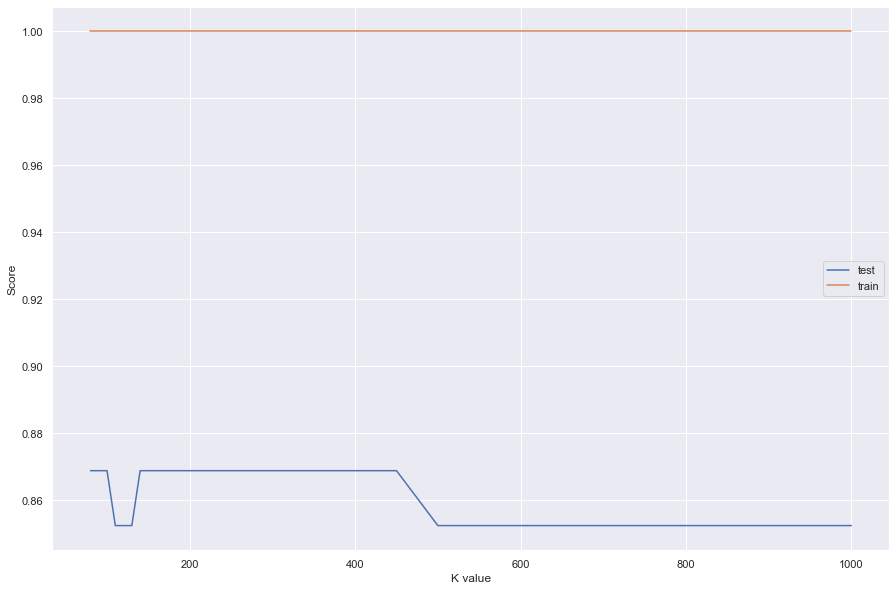

In [66]:
score_list_test = []
score_list_train = []
for i in my_gen():
    clf_rf = RandomForestClassifier(n_estimators=i, random_state=1)
    score_list_train.append(clf_rf.score(x_train, y_train))
    score_list_test.append(clf_rf.score(x_test, y_test))
    
plt.plot(list(my_gen()), score_list_test, label='test')
plt.plot(list(my_gen()), score_list_train, label='train')
plt.xlabel("K value")
plt.ylabel("Score")
plt.legend()

In [81]:
clf_rf = RandomForestClassifier(n_estimators = 120)
clf_rf.fit(x_train, y_train)
clf_rf.score(x_test, y_test)

0.8524590163934426

In [82]:
confusion_matrix(y_test, clf_rf.predict(x_test))

array([[23,  4],
       [ 5, 29]], dtype=int64)